# Lab 5. Data Modeling - Part 2: KNN

In [70]:
######################################################################

### Lab Assignment 5.5.

Remember that wheat dataset you used while exploring visualizations? It's about to make a comeback! While learning the many classification algorithms we're going to cover in the next few sections, it's a good idea to have a 'benchmark dataset' to come back to, so you can can compare the performance and accuracy of other algorithms.

1. Start by looking through the starter code /Module5/assignment5.py and /Module1/Datasets/wheat.data
2. Complete the assignment except for the bonus instruction.
3. Try experimenting with other feature scaling methods, in addition to normalize(), to see how they affect the decision boundary.
4. Then, answer the following questions.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
matplotlib.style.use('ggplot') # Look Pretty

Populating the interactive namespace from numpy and matplotlib


In [100]:
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
# .. your code here ..
X = pd.read_csv('Module5/Datasets/wheat.data')
X.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [101]:
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
y = X['wheat_type'].copy()
X.drop(labels=['id', 'wheat_type'], inplace=True, axis=1)    #  <--  기억할 것 !!!!!

X.head()

,area,perimeter,compactness,length,width,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [102]:
# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
# .. your code here ..
y.dtype # dtype('O') means 'objects'

dtype('O')

In [103]:
# just for my testing
unique(y)

array(['canadian', 'kama', 'rosa'], dtype=object)

In [104]:
# Convert to category
y = y.astype("category").cat.codes # <-- Remember this. ex) df['colname'] = df['colname'].astype("category").cat.codes
print y.dtype
y.head()

int8


0    1
1    1
2    1
3    1
4    1
dtype: int8

In [105]:
X.dtypes

area           float64
perimeter      float64
compactness    float64
length         float64
width          float64
asymmetry      float64
groove         float64
dtype: object

In [109]:
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
X.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
dtype: int64

In [110]:
# Just for my testing
X.groove.isnull().sum()

0

In [111]:
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here .. 

# X.compactness.fillna(X.compactness.mean(), inplace=True) # Same 
X['compactness'].fillna(X['compactness'].mean(), inplace=True)    # fillna() 결과를 따로 할당할 필요 없음
X['width'].fillna(X['width'].mean(), inplace=True)
X['groove'].fillna(X['groove'].mean(), inplace=True)
X.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
dtype: int64

In [112]:
# (Testing):  for문 사용해서 각각의 column을 mean()으로 fillna  할 수 없음 (이유는 col이 str object임)
'''
for col in X.columns:
    #print col.dtype
    if col.isnull.sum() != 0:
        col.fillna(col.mean())
'''
#---------------------------------------------------------------------------
#AttributeError                            Traceback (most recent call last)
#<ipython-input-36-94d704b0ec72> in <module>()
#      1 for col in X.columns:
#----> 2     print col.dtype
#
#AttributeError: 'str' object has no attribute 'dtype'

'\nfor col in X.columns:\n    #print col.dtype\n    if col.isnull.sum() != 0:\n        col.fillna(col.mean())\n'

In [113]:
# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. 
# This is important so that your answers are verifiable. 
# In the real world, you wouldn't specify a random_state.
#
# .. your code here ..
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [114]:
len(X_train), len(X_test), len(y_train), len(y_test)

(140, 70, 140, 70)

In [115]:
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..
from sklearn import preprocessing 

normalizer = preprocessing.Normalizer().fit(X_train)  # fit does nothing
normalizer 

#T = preprocessing.normalize(X) # 다른 애

Normalizer(copy=True, norm='l2')

In [122]:
# TODO: With your trained pre-processor, transform both your training AND testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has been fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
# .. your code here ..
trans_train_data = normalizer.transform(X_train)
trans_test_data = normalizer.transform(X_test)

In [123]:
# TODO: Just like your preprocessing transformation, create a PCA
# transformation as well. Fit it against your training data, and then
# project your training and testing features into PCA space using the
# PCA model's .transform() method.
#
# NOTE: This has to be done because the only way to visualize the decision
# boundary in 2D would be if your KNN algo ran in 2D as well:
#
# .. your code here ..
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(trans_train_data)

PCA(copy=True, n_components=2, whiten=False)

In [125]:
X_train_pca = pca.transform(trans_train_data)
X_test_pca = pca.transform(trans_test_data)

In [144]:
# TODO: Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure train your classifier against the pre-processed, PCA-
# transformed training data above! You do not, of course, need to transform
# your labels.
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

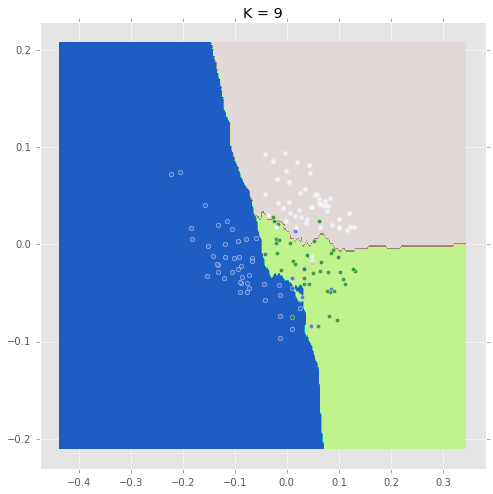

In [145]:
def plotDecisionBoundary(model, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.6
    resolution = 0.0025
    colors = ['royalblue','forestgreen','ghostwhite']

    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

    # Plot the test original points as well...
    for label in range(len(np.unique(y))):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

    p = model.get_params()
    plt.axis('tight')
    plt.title('K = ' + str(p['n_neighbors']))


# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'
plotDecisionBoundary(knn, X_train_pca, y_train)

In [146]:
# TODO: Display the accuracy score of your test data/labels, computed by
# your KNeighbors model.
#
# NOTE: You do NOT have to run .predict before calling .score, since
# .score will take care of running your predictions for you automatically.
#
# .. your code here ..

prediction = knn.predict(X_test_pca)
prediction

array([1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2,
       0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1,
       2], dtype=int8)

In [147]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.87142857142857144

In [148]:
# Other's code (Same effect)
print knn.score(X_test_pca, y_test)

0.871428571429


In [143]:
# BONUS: Instead of the ordinal conversion, try and get this assignment
# working with a proper Pandas get_dummies for feature encoding. HINT:
# You might have to update some of the plotDecisionBoundary code.
fig = plt.figure(figsize(8,8))
plt.show()

### Lab Questions 5.5.

##### Q1. Please enter a numeric value (e.g. 0, 1, 10.5, etc) which correctly answers the question(s) below:

What is the accuracy score of your KNeighbors Classifier when K=9 (Enter as a decimal)?
 
<b>* My answer</b>: 0.871428571429 (<== <b>Correct!</b>)

<b>* Explanation</b>: Follow the steps in the starter code file. Each 'TODO' should be accomplishable with just 1-4 lines of code. The accuracy value you should be getting if you set the random state properly is 0.871428571429.


##### Q2. Decrease K by 1 and record the new accuracy score. Keep doing this until you get down to, and including, K=1. Concerning the scores you saw: 

- (a) I was able to get one higher reading
- (b) I did not see the same accuracy again
- (c) The accuracy went down, but then started going up again
- (d) I got the same result, but overfit my data.

<b>* My answer</b>: (d) I got the same result, but overfit my data. (<== <b>Correct!</b>) (score값이 같아 맞추긴 했는데 왜 overfit이지
?)

<b>* Explanation</b>: You should also have been able to see that same accuracy score one other time, surprisingly, when K=1. However this is overfitting your data.

In [149]:
# Note !!
# Congratulations on training your computer to identify wheat kernels! 
# As you know, PCA throws away some of your data. 
# Yet, you were able to get the high accuracy level you got in this lab by 
# applying KNeighbors to just two principal components! 

# If you're ready for a bonus experiment, remove both the PCA code as well as 
# the visualization code from the lab. 

# Run the KNeighbors Classifier on your entire X_train dataset and see how it 
# performs compared to the PCA-only version you just completed above. 
# Does it perform better? Or worse?

# You can also try properly encoding the wheat_type series as a dummy feature, 
# spanning three columns. If you attempt that, be sure to adjust your .predict() 
# and .score() methods to fit.

In [ ]:
######################################################################

### Lab Assignment 5.6.

In this assignment, you'll flex your understanding of Isomap and KNeighbors, as well as practice splitting your data for testing and evaluation by taking your Module4/assignment4.py lab to the next level. If you haven't been able to complete module four's labs or haven't fully understood them, take a moment to re-do them all before proceeding.

This assignment was engineered to be truer to the life of a data scientist by being more challenging than previous ones, so do not be disheartened. If data explorers only needed to drop their observations into black-box algorithms without investing time to toggle parameters, and experiment and understand what those algorithms were truly doing to their data, they wouldn't be valued as much.

In module four's fourth lab assignment, you explored using isomap, an indispensable tool to have while working with non-linear datasets. Your goal this time is to train the KNeighborsClassifier to identify what direction a face is pointing towards: either up, down, left, or right.

![alt text](http://courses.edx.org/asset-v1:Microsoft+DAT210x+4T2016+type@asset+block@Facing.png "Title")

This data takes the form of image samples that have been transformed either using PCA to reduce their linear dimensionality, or isomap to non-linearly do similar. Start by reviewing your lab work in the Module4/<b>assignment4.py</b> file before opening up the /Module5/<b>assignment6.py</b> starter code. You will need access to the <b>face_data.mat</b> file from Module four, as well as the new Module5/<b>face_labels.csv</b> file.

1. Add in the Module4/assignment4.py code responsible for: loading up the .mat file, properly rotating its images, and storing the whole thing into a Pandas dataframe object.
2. Load into a dataframe your classifications faces_labels.csv file. Make sure your dataframe and your .csv file align properly and start from the same values! This classification dataframe only has a single column in it, so create a series (a slice) that selects only that column and save it as label.
3. Do your train_test_split just as directed in the reading. Set random_state=7, and play around with test_size as documented. Your variables should be: data_train, data_test, label_train, and label_test.
4. Fill out the code for PCA, Isomap, and KNeighborsClassifier. Both PCA and Isomap should be reducing your training data's dimensionality down to 2D. You're free to experiment with different K values for KNeighborsClassifier.
5. Predict the accuracy of the test dataset / test label using .score() and print it out.
6. Answer the questions below:

In [92]:
# Load libraries
import random, math
import pandas as pd
import numpy as np
import scipy.io

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#%pylab inline
matplotlib.style.use('ggplot') # Look Pretty

In [93]:
# If you'd like to try this lab with PCA instead of Isomap,
# as the dimensionality reduction technique:
#Test_PCA = True
Test_PCA = False

In [73]:
# TODO: Use the same code from Module4/assignment4.py to load up the face_data.mat 
# in a dataset called "df". Be sure to calculate the num_pixels value, and to rotate 
# the images to being right-side-up instead of sideways. 
# This was demonstrated in the M4/A4 code:
# .. your code here ..

# (From Module4/assgnment4.py)
# A .MAT file is a .MATLAB file. The faces dataset could have came in through .png images, 
# but we'll show you how to do that in anither lab. For now, you'll see how to import .mats:
mat = scipy.io.loadmat('Module4/Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

In [74]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000781,0,0,0,0,0,0,0,0,0
1,0.016176,0.000000,0.000000,0.000000,0.007062,0.056710,0.192279,0.380607,0.504733,0.514920,...,0.000000,0,0,0,0,0,0,0,0,0
2,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0,0,0,0,0,0,0,0
3,0.016176,0.110754,0.384988,0.510034,0.608609,0.743229,0.735126,0.664675,0.774494,0.792233,...,0.000000,0,0,0,0,0,0,0,0,0
4,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0,0,0,0,0,0,0,0


In [75]:
df.shape

(698, 4096)

In [76]:
# TODO: Load up your face_labels dataset. It only has a single column, and
# you're only interested in that single column. You will have to slice the 
# column out so that you have access to it as a "Series" rather than as a
# "Dataframe". Use an appropriate indexer to take care of that. Also print
# out the labels and compare to the face_labels.csv file to ensure you
# loaded it correctly
#
# .. your code here ..
face_label = pd.read_csv('Module5/Datasets/face_labels.csv')
face_label.head()

,0
0,2
1,0
2,2
3,0
4,2


In [77]:
# (continued)
myseries_label = face_label.iloc[:,0]
print "myseries_label.dtype: ", myseries_label.dtype
print "type(myseries): ", type(myseries_label)
myseries_label.head()

myseries_label.dtype:  int64
type(myseries):  <class 'pandas.core.series.Series'>


0    2
1    0
2    2
3    0
4    2
Name: 0, dtype: int64

In [78]:
myseries_label.shape

(697,)

In [79]:
myseries_label.isnull().sum()

0

In [80]:
df.isnull().sum().sum()

0

In [81]:
# TODO: Do train_test_split. Use the same code as on the EdX platform in the
# reading material, but set the random_state=7 for reproduceability, and play
# around with the test_size from 0.10 - 0.20 (10-20%). 

# Your labels are actually passed in as a series (instead of as an NDArray) so that 
# you can access their underlying indices later on. This is necessary so you can find 
# your samples in the original dataframe, which you will use to plot your testing data 
# as images rather than as points:
#
# .. your code here ..

In [82]:
# Remove the first row in df because lengths of df & label do not match
df.drop(df.index[:1], inplace=True)
len(df)

697

In [84]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn import manifold # isomap
from sklearn.neighbors import KNeighborsClassifier

In [100]:
''' 
#  처음에는 train_test_split를 PCA / isoMap fit & transform  보다 먼저 해야하는 줄 알았음

#data_train, data_test, label_train, label_test = train_test_split(face_label, myseries_label, test_size=0.10, random_state=7)
data_train, data_test, label_train, label_test = train_test_split(df, myseries_label, test_size=0.10, random_state=7)
len(data_train), len(data_train), len(label_train), len(label_train)
'''

' \n#  \xec\xb2\x98\xec\x9d\x8c\xec\x97\x90\xeb\x8a\x94 train_test_split\xeb\xa5\xbc PCA / isoMap fit & transform  \xeb\xb3\xb4\xeb\x8b\xa4 \xeb\xa8\xbc\xec\xa0\x80 \xed\x95\xb4\xec\x95\xbc\xed\x95\x98\xeb\x8a\x94 \xec\xa4\x84 \xec\x95\x8c\xec\x95\x98\xec\x9d\x8c\n\n#data_train, data_test, label_train, label_test = train_test_split(face_label, myseries_label, test_size=0.10, random_state=7)\ndata_train, data_test, label_train, label_test = train_test_split(df, myseries_label, test_size=0.10, random_state=7)\nlen(data_train), len(data_train), len(label_train), len(label_train)\n'

In [61]:
'''
#train_test_split를 PCA / isoMap fit & transform  보다 먼저 했던 걸로 실행한 경우
if Test_PCA:
    # INFO: PCA is used *before* KNeighbors to simplify your high dimensionality 
    # image samples down to just 2 principal components! A lot of information
    # (variance) is lost during the process, as I'm sure you can imagine. But
    # you have to drop the dimension down to two, otherwise you wouldn't be able
    # to visualize a 2D decision surface / boundary. In the wild, you'd probably
    # leave in a lot more dimensions, but wouldn't need to plot the boundary;
    # simply checking the results would suffice.
    #
    # Your model should only be trained (fit) against the training data (data_train)
    # Once you've done this, you need use the model to transform both data_train
    # and data_test from their original high-D image feature space, down to 2D
    #
    # TODO: Implement PCA here. ONLY train against your training data, but
    # transform both your training + test data, storing the results back into
    # data_train, and data_test.
    #
    # .. your code here ..
    pca = PCA(n_components=2)
    pca.fit(data_train)
    data_train = pca.transform(data_train)
    data_test = pca.transform(data_test)
    
else:
    # INFO: Isomap is used *before* KNeighbors to simplify your high dimensionality
    # image samples down to just 2 components! A lot of information has been is
    # lost during the process, as I'm sure you can imagine. But if you have
    # non-linear data that can be represented on a 2D manifold, you probably will
    # be left with a far superior dataset to use for classification. Plus by
    # having the images in 2D space, you can plot them as well as visualize a 2D
    # decision surface / boundary. In the wild, you'd probably leave in a lot
    # more dimensions, but wouldn't need to plot the boundary; simply checking
    # the results would suffice.
    #
    # Your model should only be trained (fit) against the training data (data_train)
    # Once you've done this, you need use the model to transform both data_train
    # and data_test from their original high-D image feature space, down to 2D

    #
    # TODO: Implement Isomap here. ONLY train against your training data, but
    # transform both your training + test data, storing the results back into
    # data_train, and data_test.
    #
    # .. your code here ..
    iso = manifold.Isomap(n_neighbors = 6, n_components=2)
    iso.fit(data_train)
    data_train = iso.transform(data_train)
    data_test = iso.transform(data_test)'''

In [94]:
if Test_PCA:
    # INFO: PCA is used *before* KNeighbors to simplify your high dimensionality 
    # image samples down to just 2 principal components! A lot of information
    # (variance) is lost during the process, as I'm sure you can imagine. But
    # you have to drop the dimension down to two, otherwise you wouldn't be able
    # to visualize a 2D decision surface / boundary. In the wild, you'd probably
    # leave in a lot more dimensions, but wouldn't need to plot the boundary;
    # simply checking the results would suffice.
    #
    # Your model should only be trained (fit) against the training data (data_train)
    # Once you've done this, you need use the model to transform both data_train
    # and data_test from their original high-D image feature space, down to 2D
    #
    # TODO: Implement PCA here. ONLY train against your training data, but
    # transform both your training + test data, storing the results back into
    # data_train, and data_test.
    #
    # .. your code here ..
    pca = PCA(n_components=2)
    pca.fit(df)
    trans_df = pca.transform(df)
    
else:
    # INFO: Isomap is used *before* KNeighbors to simplify your high dimensionality
    # image samples down to just 2 components! A lot of information has been is
    # lost during the process, as I'm sure you can imagine. But if you have
    # non-linear data that can be represented on a 2D manifold, you probably will
    # be left with a far superior dataset to use for classification. Plus by
    # having the images in 2D space, you can plot them as well as visualize a 2D
    # decision surface / boundary. In the wild, you'd probably leave in a lot
    # more dimensions, but wouldn't need to plot the boundary; simply checking
    # the results would suffice.
    #
    # Your model should only be trained (fit) against the training data (data_train)
    # Once you've done this, you need use the model to transform both data_train
    # and data_test from their original high-D image feature space, down to 2D

    #
    # TODO: Implement Isomap here. ONLY train against your training data, but
    # transform both your training + test data, storing the results back into
    # data_train, and data_test.
    #
    # .. your code here ..
    iso = manifold.Isomap(n_neighbors = 6, n_components=2)
    iso.fit(df)
    trans_df = iso.transform(df)

In [101]:
#data_train, data_test, label_train, label_test = train_test_split(face_label, myseries_label, test_size=0.10, random_state=7)
data_train, data_test, label_train, label_test = train_test_split(trans_df, myseries_label, test_size=0.10, random_state=7)
len(data_train), len(data_train), len(label_train), len(label_train)

(627, 627, 627, 627)

In [102]:
# TODO: Implement KNeighborsClassifier here. You can use any K value from 1
# through 20, so play around with it and attempt to get good accuracy.
# This is the heart of this assignment: Looking at the 2D points that
# represent your images, along with a list of "answers" or correct class
# labels that those 2d representations should be.
#
# .. your code here ..
knn = KNeighborsClassifier(n_neighbors=9) # try 1~20
knn.fit(data_train, label_train)

# NOTE: K-NEIGHBORS DOES NOT CARE WHAT THE ANSWERS SHOULD BE! In fact, it
# just tosses that information away. All KNeighbors cares about storing is
# your training data (data_train) so that later on when you attempt to
# predict or score samples, it can derive a class for them based on the
# labeling of the sample's near neighbors.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [97]:
# TODO: Calculate + Print the accuracy of the testing set (data_test and
# label_test).
#
# .. your code here ..
prediction = knn.predict(data_test)
prediction

array([0, 0, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 0, 3, 0, 2, 1, 1, 2, 2, 1, 0, 0,
       2, 2, 0, 3, 0, 2, 0, 3, 0, 2, 0, 3, 2, 3, 1, 0, 0, 3, 2, 1, 2, 0, 3,
       2, 0, 2, 0, 1, 2, 2, 2, 3, 1, 2, 2, 2, 1, 0, 2, 2, 3, 3, 0, 0, 0, 2,
       3])

In [98]:
print knn.score(data_test, label_test)

0.957142857143


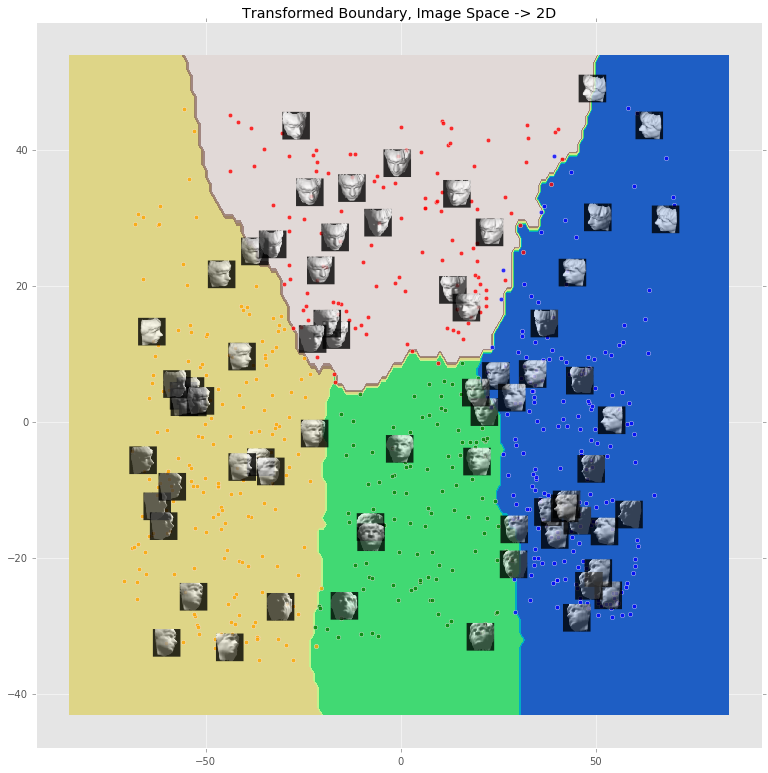

In [99]:
def Plot2DBoundary(DTrain, LTrain, DTest, LTest):
    # The dots are training samples (img not drawn), and the pics are testing samples (images drawn)
    # Play around with the K values. This is very controlled dataset so it should be able to get perfect classification on testing entries
    # Play with the K for isomap, play with the K for neighbors. 

    fig = plt.figure(figsize(13,13))
    ax = fig.add_subplot(111)
    ax.set_title('Transformed Boundary, Image Space -> 2D')

    padding = 0.1   # Zoom out
    resolution = 1  # Don't get too detailed; smaller values (finer rez) will take longer to compute
    colors = ['blue','green','orange','red']


    # ------

    # Calculate the boundaries of the mesh grid. The mesh grid is
    # a standard grid (think graph paper), where each point will be
    # sent to the classifier (KNeighbors) to predict what class it
    # belongs to. This is why KNeighbors has to be trained against
    # 2D data, so we can produce this countour. Once we have the 
    # label for each point on the grid, we can color it appropriately
    # and plot it.
    x_min, x_max = DTrain[:, 0].min(), DTrain[:, 0].max()
    y_min, y_max = DTrain[:, 1].min(), DTrain[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Using the boundaries, actually make the 2D Grid Matrix:
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say about each spot on the chart?
    # The values stored in the matrix are the predictions of the model
    # at said location:
    model = knn # I added 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the mesh grid as a filled contour plot:
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, z=-100)


    # ------

    # When plotting the testing images, used to validate if the algorithm
    # is functioning correctly, size them as 5% of the overall chart size
    x_size = x_range * 0.05
    y_size = y_range * 0.05

    # First, plot the images in your TEST dataset
    img_num = 0
    for index in LTest.index:
        # DTest is a regular NDArray, so you'll iterate over that 1 at a time.
        x0, y0 = DTest[img_num,0]-x_size/2., DTest[img_num,1]-y_size/2.
        x1, y1 = DTest[img_num,0]+x_size/2., DTest[img_num,1]+y_size/2.

        # DTest = our images isomap-transformed into 2D. But we still want
        # to plot the original image, so we look to the original, untouched
        # dataset (at index) to get the pixels:
        img = df.iloc[index,:].reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1), alpha=0.8)
        img_num += 1


    # Plot your TRAINING points as well... as points rather than as images
    for label in range(len(np.unique(LTrain))):
        indices = np.where(LTrain == label)
        ax.scatter(DTrain[indices, 0], DTrain[indices, 1], c=colors[label], alpha=0.8, marker='o')

    # Plot
    plt.show()  


# Chart the combined decision boundary, the training data as 2D plots, and
# the testing data as small images so we can visually validate performance.
Plot2DBoundary(data_train, label_train, data_test, label_test)


### Lab Questions 5.6.

##### Q. Only one of the following setups is ideal if you plan on using SciKit-Learn's KNeighbors classifier to predict the label of your samples after transforming them. Which is it?

- (a) Fit and transform your data using PCA or Isomap. Split your data. Then fit the KNeighbors model against the training data and labels. Then predict the class of your testing data.
- (b) Use preprocessing to scale your training and testing data. Split your data. Fit and transform your training data using PCA or Isomap, and fit the KNeighbors model against the training data and labels. Then predict the class of your testing data.
- (c) Use preprocessing to scale your training and testing data. Split your data. Fit and transform your testing data using PCA or Isomap, and fit the KNeighbors model against the training data and labels. Then predict the class of your testing data.
- (d) Fit and transform your data using PCA or Isomap. Then fit the KNeighbors model against your data and labels. Then split your data and predict the class of your testing data. 

<b>* My 1st answer</b>: (b) (<== <b>Correct!</b>)
<b>* My 2nd answer</b>: (a) (<== <b>Correct!</b>)

<b>* Explanation</b>: 
Preprocessing is not a requirement, so that has been thrown into the mix and a red herring. The important thing to note here is that you only want to split your data before the steps involved with the actual prediction. Isomap and PCA are used simply to transform your data, e.g. as preprocessing transformations. The same transformation needs to be applied to your testing and training data, and even to future unlabeled samples you encounter in the future.

It doesn't make sense to predict your testing data after you've trained your model against it, because it would have already seen the 'answers' or labels for it.

Also if you only transform your training data via PCA or Isomap but neglect to do so for your testing data, then you will have two different feature spaces and will not be able to use KNeighbors to predict a class between them.

In [ ]:
######################################################################

### Lab Assignment 5.7.

Breast cancer usually starts from an uncontrolled growth of the cells that make up the milk-producing ducts. While fairly uncommon with men (less than 0.1% experience it), according to BreastCancer.org, one in eight women (12%) end up developing a malignant form of breast cancer over the course of their lifetime. These invasive cells form tumors that destroy nearby tissue, can spread to other parts of the body, and if not duly addressed, may result in death. To put things into perspective, in the U.S., roughly [600 women die per year](http://www.cdc.gov/reproductivehealth/MaternalInfantHealth/Pregnancy-relatedMortality.htm) due to pregnancy related complications... yet over [40,000 die per year](http://www.breastcancer.org/symptoms/understand_bc/statistics) due to breast cancer.

Breast cancer doesn't develop over night and, like any other cancer, can be treated extremely effectively if detected in its earlier stages. Part of the understanding cancer is knowing that not all irregular cell growths are malignant; some are benign, or non-dangerous, non-cancerous growths. A benign tumor does not mean the mass doesn't increase in size, but only means it does not pose a threat to nearby tissue, nor is it likely to spread to other parts of the body. The mass simply stays wherever it's growing. Benign tumors are actually pretty popular, such as moles and some warts. Being able to properly assess if a tumor is actually benign and ignorable, or malignant and alarming is therefore of importance, and also is a problem that might be solvable through data and machine learning.

In this lab, you'll be using the [Breast Cancer Wisconsin Diagnostic data set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29), provided courtesy of UCI's Machine Learning Repository. A copy of the dataset is located at Module5/Datasets/<b>breast-cancer-wisconsin.data</b>. Here are the column names, which you can read more details about on the dataset's information page: ['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status'].

1. Open up the starter code located in Module5/assignment7.py, and as usual, read through it entirely.
2. Load up and clean up the dataset, and then do feature scaling since the features use different units.
3. Split your data into training and testing sets.
4. Implement both PCA and IsoMap so you can test the performance of both, as the technique used to reduce the dimensionality of the dataset down to two variables.
5. Train KNeighborsClassifier on the 2D projected training dataset, the score KNeighborsClassifier on the 2D projected testing dataset.
6. Finally, plot the decision boundary for visual confirmation.

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# If you'd like to try this lab with PCA instead of Isomap,
# as the dimensionality reduction technique:
Test_PCA = True

In [4]:
# TODO: Load in the dataset, identify nans, and set proper headers.
# Be sure to verify the rows line up by looking at the file in a text editor.
# 
# .. your code here ..
#  ['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status'].
df_cancer = pd.read_csv('Module5/Datasets/breast-cancer-wisconsin.data', header=None)
df_cancer.columns =  ['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']
df_cancer.head()

,sample,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# TODO: Copy out the status column into a slice, then drop it from the main
# dataframe. You can also drop the sample column, since that doesn't provide
# us with any machine learning power.
#
# .. your code here ..
y = df_cancer['status'].copy()
df_cancer.drop(labels=['sample','status'], inplace=True, axis=1)
df_cancer.head()

,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [6]:
# TODO: With the labels safely extracted from the dataset, replace any nan values
# with the mean feature / column value
#
# .. your code here ..
df_cancer.isnull().sum() # first Check 

thickness     0
size          0
shape         0
adhesion      0
epithelial    0
nuclei        0
chromatin     0
nucleoli      0
mitoses       0
dtype: int64

In [7]:
# Check dtypes for missing values
df_cancer.dtypes

thickness      int64
size           int64
shape          int64
adhesion       int64
epithelial     int64
nuclei        object
chromatin      int64
nucleoli       int64
mitoses        int64
dtype: object

In [8]:
df_cancer.nuclei.unique() # Found missing values ('?')

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

In [9]:
df_cancer.nuclei = pd.to_numeric(df_cancer.nuclei, errors='coerce')
df_cancer.nuclei.unique() 

array([  1.,  10.,   2.,   4.,   3.,   9.,   7.,  nan,   5.,   8.,   6.])

In [10]:
df_cancer['nuclei'].fillna(df_cancer['nuclei'].mean(), inplace=True)
df_cancer.isnull().sum()

thickness     0
size          0
shape         0
adhesion      0
epithelial    0
nuclei        0
chromatin     0
nucleoli      0
mitoses       0
dtype: int64

In [11]:
# TODO: Experiment with the basic SKLearn preprocessing scalers. We know that
# the features consist of different units mixed in together, so it's reasonable
# to assume feature scaling is necessary. Print out a description of the
# dataset, post transformation.
#
# .. your code here ..
df_cancer.describe()

,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
from sklearn import preprocessing
df_normalized = preprocessing.normalize(df_cancer)

In [13]:
# For my testing
df_normalized[:5]

array([[ 0.75377836,  0.15075567,  0.15075567,  0.15075567,  0.30151134,
         0.15075567,  0.45226702,  0.15075567,  0.15075567],
       [ 0.31943828,  0.25555063,  0.25555063,  0.31943828,  0.4472136 ,
         0.63887656,  0.19166297,  0.12777531,  0.06388766],
       [ 0.53881591,  0.1796053 ,  0.1796053 ,  0.1796053 ,  0.3592106 ,
         0.3592106 ,  0.53881591,  0.1796053 ,  0.1796053 ],
       [ 0.38023455,  0.5069794 ,  0.5069794 ,  0.06337243,  0.19011728,
         0.2534897 ,  0.19011728,  0.44360698,  0.06337243],
       [ 0.60999428,  0.15249857,  0.15249857,  0.45749571,  0.30499714,
         0.15249857,  0.45749571,  0.15249857,  0.15249857]])

In [14]:
# TODO: Do train_test_split. Use the same variable names as on the EdX platform in
# the reading material, but set the random_state=7 for reproduceability, and keep
# the test_size at 0.33 (33%).
#
# .. your code here ..
from sklearn.cross_validation import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df_normalized, y, test_size=0.33, random_state=7)

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [17]:
# PCA and Isomap are your new best friends
model = None
if Test_PCA:
    print "Computing 2D Principle Components"
    #
    # TODO: Implement PCA here. save your model into the variable 'model'.
    # You should reduce down to two dimensions.
    #
    # .. your code here ..
    model = PCA(n_components=2)

else:
    print "Computing 2D Isomap Manifold"
    #
    # TODO: Implement Isomap here. save your model into the variable 'model'
    # Experiment with K values from 5-10.
    # You should reduce down to two dimensions.
    #
    # .. your code here ..
    model = Isomap(n_neighbors=4, n_components=2)

Computing 2D Principle Components


In [18]:
# TODO: Train your model against data_train, then transform both
# data_train and data_test using your model. You can save the results right
# back into the variables themselves.
#
# .. your code here ..
df_normalized = model.fit(df_normalized)
df_normalized

PCA(copy=True, n_components=2, whiten=False)

In [19]:
x_train = df_normalized.transform(x_train)
x_test = df_normalized.transform(x_test)

In [20]:
# TODO: Implement and train KNeighborsClassifier on your projected 2D
# training data here. You can use any K value from 1 - 15, so play around
# with it and see what results you can come up. Your goal is to find a
# good balance where you aren't too specific (low-K), nor are you too
# general (high-K). You should also experiment with how changing the weights
# parameter affects the results.
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [21]:
# INFO: Be sure to always keep the domain of the problem in mind! It's
# WAY more important to errantly classify a benign tumor as malignant,
# and have it removed, than to incorrectly leave a malignant tumor, believing
# it to be benign, and then having the patient progress in cancer. Since the UDF
# weights don't give you any class information, the only way to introduce this
# data into SKLearn's KNN Classifier is by "baking" it into your data. For
# example, randomly reducing the ratio of benign samples compared to malignant
# samples from the training set.


In [22]:
#
# TODO: Calculate + Print the accuracy of the testing set
#
# .. your code here ..
print knn.score(x_test, y_test)

0.818181818182


Plotting...


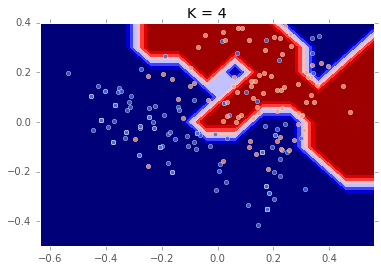

In [23]:
def plotDecisionBoundary(model, X, y):
    print "Plotting..."
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.style.use('ggplot') # Look Pretty

    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.1
    resolution = 0.1

    #(2 for benign, 4 for malignant)
    colors = {2:'royalblue',4:'lightsalmon'} 


    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    import numpy as np
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
    plt.axis('tight')

    # Plot your testing points as well...
    for label in np.unique(y):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

    p = model.get_params()
    plt.title('K = ' + str(p['n_neighbors']))
    plt.show()

#plotDecisionBoundary(model, data_test, label_test)
plotDecisionBoundary(knn, x_test, y_test)

0.831168831169
Plotting...


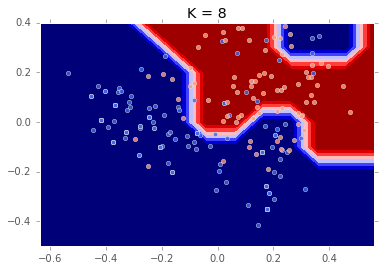

In [33]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
print knn.score(x_test, y_test)
plotDecisionBoundary(knn, x_test, y_test)

0.852813852814
Plotting...


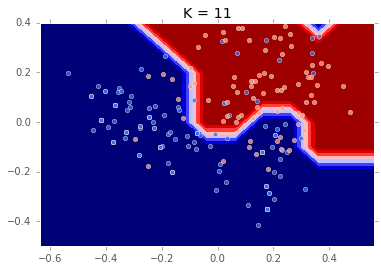

In [34]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
print knn.score(x_test, y_test)
plotDecisionBoundary(knn, x_test, y_test)

0.82683982684
Plotting...


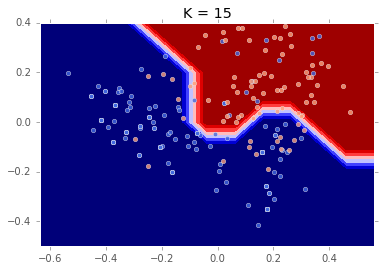

In [35]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
print knn.score(x_test, y_test)
plotDecisionBoundary(knn, x_test, y_test)

### Lab Questions 5.7.

##### Lab Question (1 point possible)

It's important to always keep the objective of the problem you're solving in mind. In this case, your goal is to come up with a way to classify tumor growths as benign or malignant, based off of a handful of features. This is so that a simple test can be administered to see if further action need be taken when a tumor is discovered.

There are two types of errors this classification can make, and they are NOT equal. The first is a false positive. This would be the algorithm errantly classifying a benigh tumor as malignant, which would then prompt doctors to investigate it further, perhaps even schedule a surgery to have it removed. It would be wasteful monetairly and in terms of resources, but not much more than that.

The other type of error would be a false negative. This would be the algorithm incorrectly classifying a dangerious, malignant tumor as benign. If that were to occur, the tumor would be given time to progress into later, more serious stages, and could potentially spread to other parts of the body. A much more dangerious situation to be in.

The KNeighbors classifier in SciKit-Learn gives you the ability to specify weights when initializing the object. By default, these weights are set to 'uniform', so every "K" neighbor has an even vote. It also allows you to specify 'distance', where the votes are scaled inversely porportionally to their distance from the sample being classified (1/d). Lastly, it allows you to specify a user defineable function.

The problem is, the UDF takes in as parameters only a vector of distances and expects an equally sized vector of weights. This doesn't allow you to take advantage of using a different metric on a per class basis to properly weigh your samples to address the undesireability of false negatives over false positives, as it's WAY more important to errantly classify a benign tumor as malignant and have it removed, than to incorrectly leave a malignant tumor, believing it to be benign, and then having the patient progress to full blown in cancer.

One work around for this would be to program your own KNeighbors classifier. Another would be to "bake" the information into your dataset by taking advantage of the fact that KNeighbors is sensitive to the distribution of your variables. For example, randomly reducing the ratio of benign samples compared to malignant samples in your training set.

Between the two provided SciKit-Learn options for weighing, which one performed better on this dataset overall, given the many 'K' permutations you experimented with?

- (A) Uniform 
- (B) Distance

<b>* My answer</b>: (B) (<== <b>Correct!</b>)

<b>* Explanation</b>: 
There are many K combination values you can try for KNeighbors and for Isomap, but you should have seen anywhere from a 0-3% accuracy boost by using Distance over Uniform for this lab. Try out many different values and you'll notice this overall.

In [ ]:
######################################################################